Implementing **regression based Decision Tree** on position salaries, icecream data and iris dataset

In [1]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from graphviz import render

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree

# Position Salaries

In [2]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = data.iloc[:, 1: 2].values
Y = data.iloc[:, 2].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Tree with MSE criteria

In [4]:
dt_regressor_mse = DecisionTreeRegressor(criterion = "mse", random_state = 0)
dt_regressor_mse.fit(X, Y)

DecisionTreeRegressor(random_state=0)

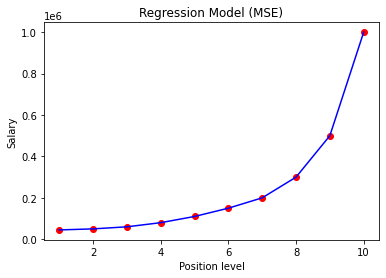

In [5]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, dt_regressor_mse.predict(X), color = 'blue')
plt.title('Regression Model (MSE)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Accuracy Score

In [6]:
dt_predict_mse = dt_regressor_mse.predict(X_test)
accuracy = accuracy_score(Y_test, dt_predict_mse)
print('Accuracy score:', accuracy)

Accuracy score: 1.0


### Classification Report

In [7]:
print('Classification Report:', classification_report(Y_test, dt_predict_mse))

Classification Report:               precision    recall  f1-score   support

       60000       1.00      1.00      1.00         1
      500000       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [8]:
dt_regressor_mse.predict([[5.5]])

array([110000.])

### Visualizing for higher resolution and smoother curve

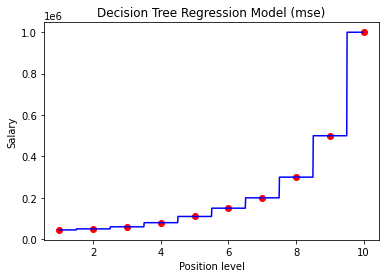

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, dt_regressor_mse.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression Model (mse)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing the tree

Methods of visualization:
1. export_text
2. plot_tree
3. export_graphviz
4. dtreeviz

**I will be using export_graphiz and plot_tree**

### export_graphviz

In [10]:
export_graphviz(dt_regressor_mse, out_file = 'PS_mse.dot')

In [ ]:
# creating png
render('dot', 'png', 'PS_mse.dot')

### plot_tree

[Text(706.2187500000001, 908.5885714285714, 'X[0] <= 8.5\nmse = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(533.5875000000001, 768.8057142857143, 'X[0] <= 6.5\nmse = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(376.65000000000003, 629.0228571428571, 'X[0] <= 4.5\nmse = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(251.10000000000002, 489.24, 'X[0] <= 3.5\nmse = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(188.32500000000002, 349.4571428571428, 'X[0] <= 2.5\nmse = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(125.55000000000001, 209.6742857142857, 'X[0] <= 1.5\nmse = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(62.775000000000006, 69.89142857142849, 'mse = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(188.32500000000002, 69.89142857142849, 'mse = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(251.10000000000002, 209.6742857142857, 'mse = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(313.875, 349.4571428571428, 'mse = 0.0\nsamples = 1\nvalue = 80000.0'),


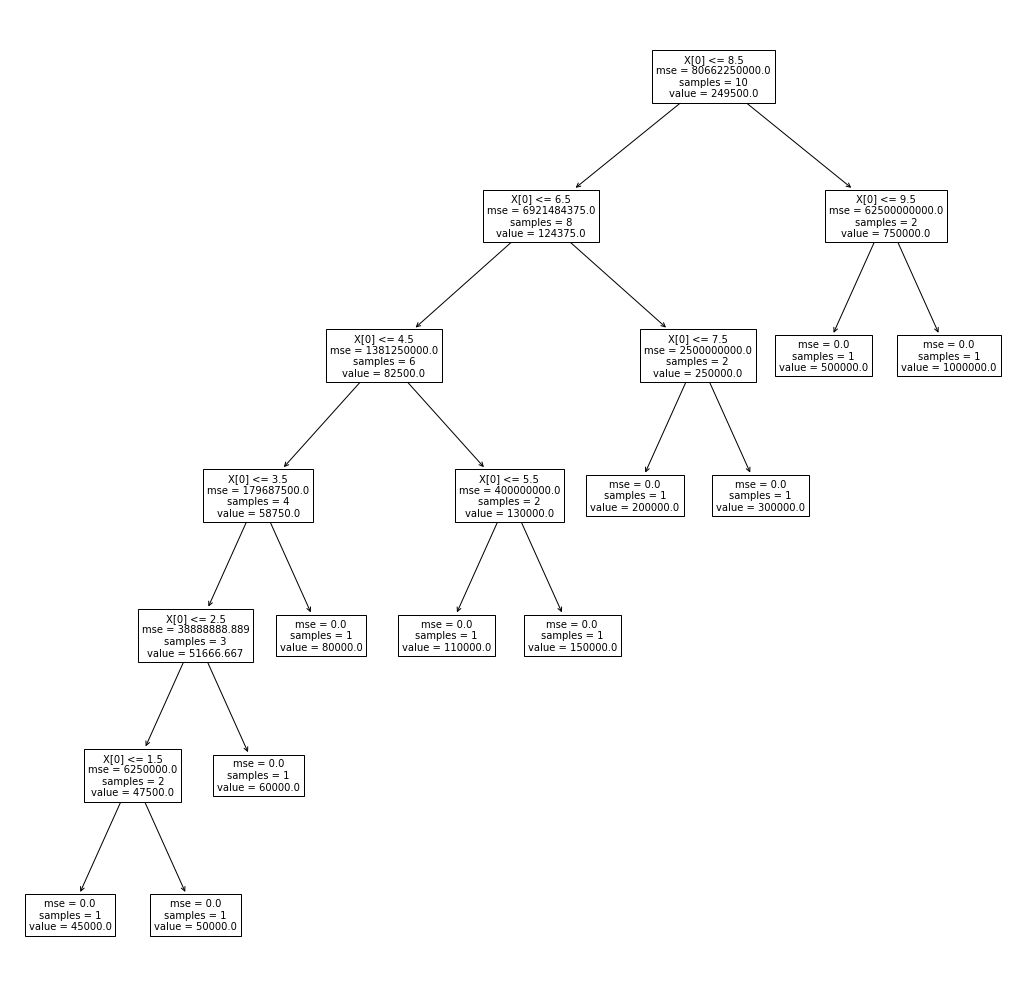

In [11]:
fig, ax = plt.subplots(figsize = (18, 18))
plot_tree(dt_regressor_mse, fontsize = 10)

# Tree with MAE criteria

In [12]:
dt_regressor_mae = DecisionTreeRegressor(criterion = 'mae', random_state = 0)
dt_regressor_mae.fit(X, Y)

DecisionTreeRegressor(criterion='mae', random_state=0)

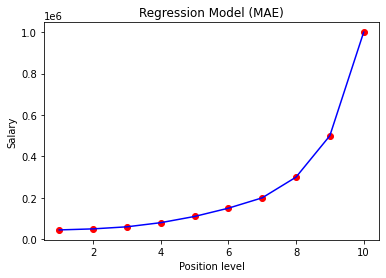

In [13]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, dt_regressor_mae.predict(X), color = 'blue')
plt.title('Regression Model (MAE)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
dt_predict_mae = dt_regressor_mae.predict(X_test)
accuracy = accuracy_score(Y_test, dt_predict_mae)
print('Accuracy score:', accuracy)

Accuracy score: 1.0


In [15]:
print('Classification Report:', classification_report(Y_test, dt_predict_mae))

Classification Report:               precision    recall  f1-score   support

       60000       1.00      1.00      1.00         1
      500000       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [16]:
dt_regressor_mae.predict([[5.5]])

array([110000.])

### Visualizing for higher resolution and smoother curve

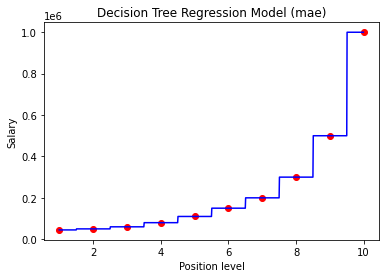

In [17]:
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, dt_regressor_mae.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression Model (mae)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### export_graphviz

In [18]:
export_graphviz(dt_regressor_mae, out_file = 'PS_mae.dot')

In [ ]:
render('dot', 'png', 'PS_mae.dot')

### plot_tree

[Text(681.5571428571429, 896.94, 'X[0] <= 9.5\nmae = 180500.0\nsamples = 10\nvalue = 130000.0'),
 Text(609.8142857142858, 733.86, 'X[0] <= 6.5\nmae = 101666.667\nsamples = 9\nvalue = 110000.0'),
 Text(358.7142857142857, 570.78, 'X[0] <= 3.5\nmae = 30833.333\nsamples = 6\nvalue = 70000.0'),
 Text(215.22857142857146, 407.69999999999993, 'X[0] <= 2.5\nmae = 5000.0\nsamples = 3\nvalue = 50000.0'),
 Text(143.4857142857143, 244.62, 'X[0] <= 1.5\nmae = 2500.0\nsamples = 2\nvalue = 47500.0'),
 Text(71.74285714285715, 81.53999999999996, 'mae = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(215.22857142857146, 81.53999999999996, 'mae = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(286.9714285714286, 244.62, 'mae = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(502.20000000000005, 407.69999999999993, 'X[0] <= 5.5\nmae = 23333.333\nsamples = 3\nvalue = 110000.0'),
 Text(430.4571428571429, 244.62, 'X[0] <= 4.5\nmae = 15000.0\nsamples = 2\nvalue = 95000.0'),
 Text(358.7142857142857, 81.53999999999996, 'mae = 0

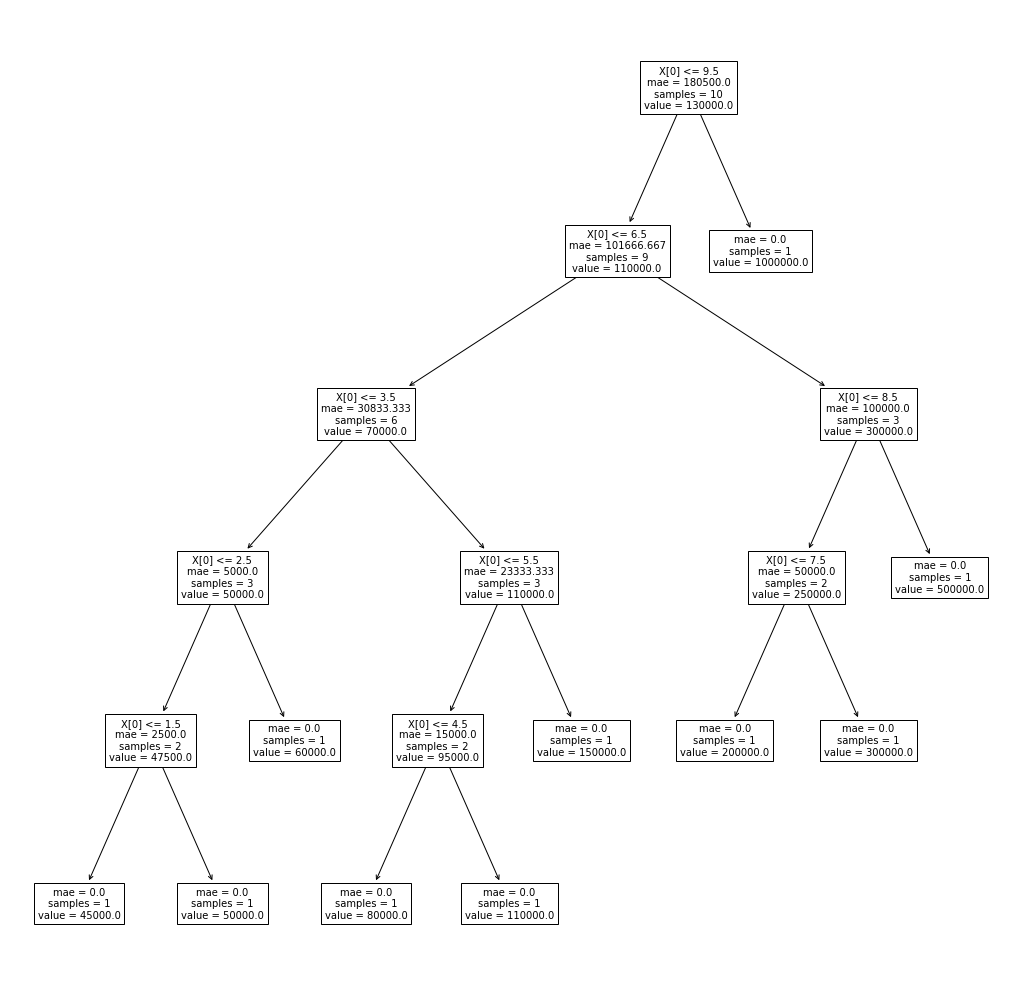

In [19]:
fig, ax = plt.subplots(figsize = (18, 18))
plot_tree(dt_regressor_mae, fontsize = 10)

# IceCream data

In [20]:
dataset = pd.read_csv(r'E:\Jupyterfiles\ML_practice\IceCreamData.csv')
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [21]:
X = dataset.iloc[:, 0].values # Temperature
Y = dataset.iloc[:, 1].values # Revenue
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Tree with MSE criteria

In [22]:
dt_clf_mse = DecisionTreeRegressor(criterion = 'mse', random_state = 0)
dt_clf_mse.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

DecisionTreeRegressor(random_state=0)

**Note: Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample**

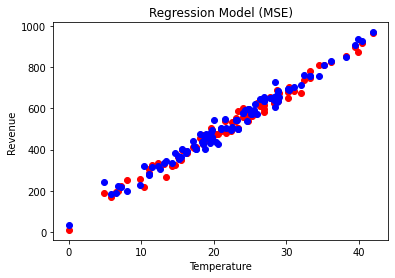

In [23]:
plt.scatter(X_test, Y_test, color = 'red')
plt.scatter(X_test, dt_clf_mse.predict(X_test.reshape(-1, 1)), color = 'blue')
plt.title('Regression Model (MSE)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

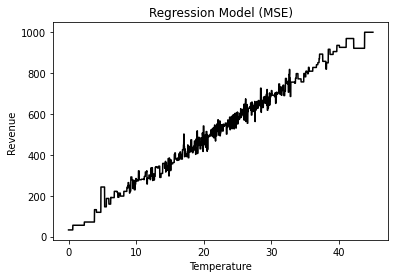

In [24]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, dt_clf_mse.predict(X_grid), color = 'black')
plt.title('Regression Model (MSE)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

## Tree with MAE criteria

In [25]:
dt_clf_mae = DecisionTreeRegressor(criterion = 'mae', random_state = 0)
dt_clf_mae.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

DecisionTreeRegressor(criterion='mae', random_state=0)

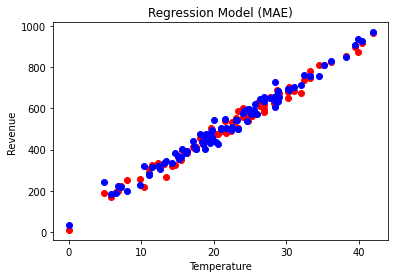

In [26]:
plt.scatter(X_test, Y_test, color = 'red')
plt.scatter(X_test, dt_clf_mae.predict(X_test.reshape(-1, 1)), color = 'blue')
plt.title('Regression Model (MAE)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

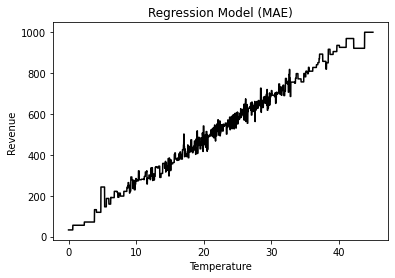

In [27]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, dt_clf_mae.predict(X_grid), color = 'black')
plt.title('Regression Model (MAE)')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

**Note: This dataset had some issue. Visualization with eport_graphviz and plot_tree was not feasible** 

# Iris

In [28]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
data = data.drop(columns = ['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Finding all the species and their counts**

In [30]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

**Statistical analysis of sepal and petal features**

In [31]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
X = data.iloc[:, 0:3].values
Y = data.iloc[:, 3]

In [33]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

**Plotting graphs for all the species** comparing their **Sepals and Petals**

In [ ]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (21, 10))

setosa.plot(x = "SepalLengthCM", y = "SepalWidthCm", kind = "scatter", ax = ax[0], label = 'setosa', color = 'r')
versicolor.plot(x = "sepal-length", y = "sepal-width", kind = "scatter", ax = ax[0], label = 'versicolor', color = 'b')
virginica.plot(x = "sepal-length", y = "sepal-width", kind = "scatter", ax = ax[0], label = 'virginica', color = 'g')


setosa.plot(x = 'petal-length', y = 'petal-width', kind = 'scatter', ax = ax[1], label = 'Setosa', color = 'r')
versicolor.plot(x = 'petal-length', y = 'petal-width', kind = 'scatter', ax = ax[1], label = 'Versicolor', color = 'b')
virginica.plot(x = 'petal-length', y = 'petal-width', kind = 'scatter', ax = ax[1], label = 'Virginica', color = 'g')

ax[0].set(title = 'Sepal comparison', ylabel = 'sepal-width')
ax[1].set(title = 'Petal comparison', ylabel = 'petal-width')
ax[0].legend()
ax[1].legend()
plt.show()

In [34]:
labelEncoder_y = LabelEncoder()
Y = labelEncoder_y.fit_transform(Y)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Tree with MSE as criteria

In [36]:
dt_regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
y_predict = dt_regressor.predict(X_test)
print(dt_regressor.score(X_test, Y_test))

0.9206839719818706


In [38]:
print('Classification report:', classification_report(Y_test, y_predict))

Classification report:               precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       0.43      0.60      0.50         5
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         3
         6.0       1.00      0.50      0.67         2
         8.0       0.00      0.00      0.00         2
         9.0       0.29      1.00      0.44         2
        10.0       0.00      0.00      0.00         3
        11.0       0.00      0.00      0.00         5
        12.0       0.00      0.00      0.00         0
        14.0       1.00      0.50      0.67         2
        15.0       0.00      0.00      0.00         0
        16.0       1.00      1.00      1.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1

    accuracy                           0.30        30
   macro avg       0.27      0.31      0.25        30
wei

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### export_graphiz

In [39]:
export_graphviz(dt_regressor, out_file = 'Iris_mse.dot')

In [ ]:
render('dot', 'png', 'Iris_mse.dot')

### plot_tree

[Text(221.5376888736264, 5448.354545454546, 'X[2] <= 4.15\nmse = 42.42\nsamples = 120\nvalue = 9.283'),
 Text(117.27197802197803, 4929.463636363636, 'X[2] <= 2.35\nmse = 9.396\nsamples = 55\nvalue = 3.2'),
 Text(68.98351648351648, 4410.572727272727, 'X[1] <= 3.25\nmse = 1.16\nsamples = 39\nvalue = 1.385'),
 Text(30.65934065934066, 3891.6818181818185, 'X[1] <= 2.65\nmse = 0.293\nsamples = 15\nvalue = 0.8'),
 Text(24.52747252747253, 3372.7909090909093, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(36.791208791208796, 3372.7909090909093, 'X[1] <= 3.15\nmse = 0.204\nsamples = 14\nvalue = 0.714'),
 Text(30.65934065934066, 2853.9, 'X[2] <= 1.55\nmse = 0.247\nsamples = 9\nvalue = 0.556'),
 Text(24.52747252747253, 2335.0090909090914, 'X[0] <= 4.7\nmse = 0.245\nsamples = 7\nvalue = 0.429'),
 Text(12.263736263736265, 1816.1181818181822, 'X[0] <= 4.35\nmse = 0.222\nsamples = 3\nvalue = 0.667'),
 Text(6.131868131868132, 1297.227272727273, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(18.3956043956

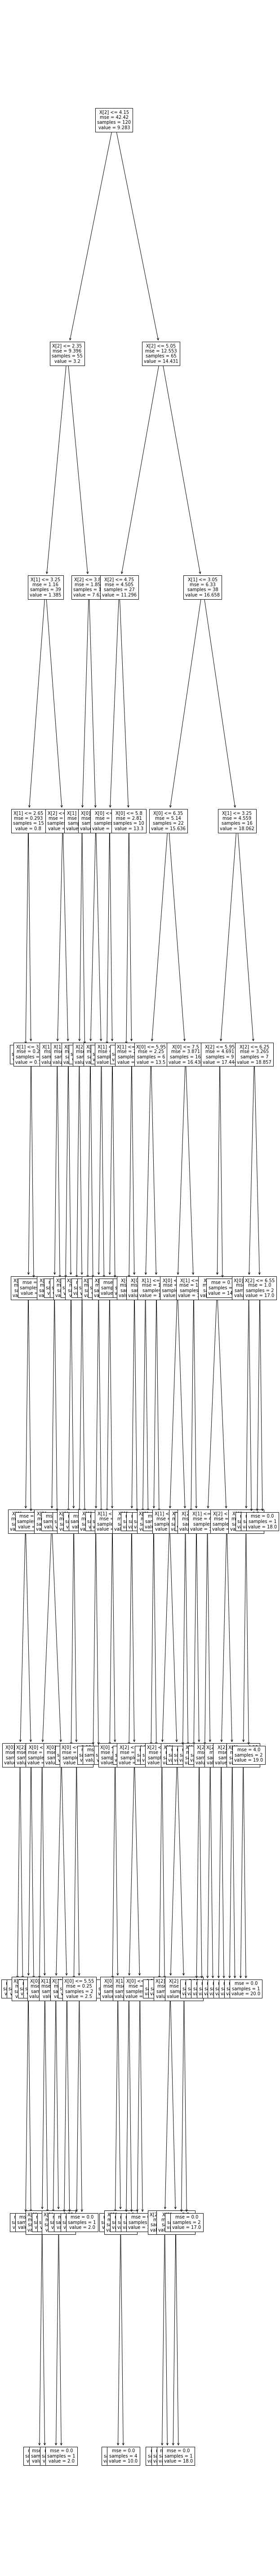

In [40]:
fig, ax = plt.subplots(figsize = (10, 105))
plot_tree(dt_regressor, fontsize = 10)

## Tree with MAE criteria

In [41]:
dt_regressor = DecisionTreeRegressor(criterion = 'mae', random_state = 0)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mae', random_state=0)

In [42]:
y_predict = dt_regressor.predict(X_test)
print(dt_regressor.score(X_test, Y_test))

0.8475484136794397


In [43]:
print('Classification report:', classification_report(Y_test, y_predict))

Classification report:               precision    recall  f1-score   support

         0.0       0.25      1.00      0.40         1
         1.0       0.50      0.40      0.44         5
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         0
         6.0       1.00      0.50      0.67         2
         8.0       0.00      0.00      0.00         2
         9.0       0.14      0.50      0.22         2
        10.0       0.00      0.00      0.00         3
        11.0       1.00      0.20      0.33         5
        14.0       0.25      0.50      0.33         2
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1

    accuracy                           0.23        30
   macro avg       0.21      0.21      0.16        30
wei

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### export_graphiz

In [44]:
export_graphviz(dt_regressor, out_file = 'Iris_mae.dot')

In [ ]:
render('dot', 'png', 'Iris_mae.dot')

### plot_tree

[Text(195.78722426470586, 5571.900000000001, 'X[2] <= 3.85\nmae = 5.633\nsamples = 120\nvalue = 9.0'),
 Text(75.90441176470587, 5300.1, 'X[2] <= 2.35\nmae = 1.413\nsamples = 46\nvalue = 1.0'),
 Text(55.389705882352935, 5028.3, 'X[1] <= 4.25\nmae = 0.641\nsamples = 39\nvalue = 1.0'),
 Text(47.18382352941176, 4756.5, 'X[2] <= 1.65\nmae = 0.605\nsamples = 38\nvalue = 1.0'),
 Text(30.77205882352941, 4484.7, 'X[0] <= 4.35\nmae = 0.5\nsamples = 34\nvalue = 1.0'),
 Text(22.566176470588232, 4212.9, 'mae = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(38.97794117647059, 4212.9, 'X[1] <= 2.65\nmae = 0.485\nsamples = 33\nvalue = 1.0'),
 Text(30.77205882352941, 3941.1000000000004, 'mae = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(47.18382352941176, 3941.1000000000004, 'X[1] <= 4.05\nmae = 0.469\nsamples = 32\nvalue = 1.0'),
 Text(38.97794117647059, 3669.3, 'X[1] <= 3.05\nmae = 0.452\nsamples = 31\nvalue = 1.0'),
 Text(16.41176470588235, 3397.5, 'X[2] <= 1.35\nmae = 0.25\nsamples = 4\nvalue = 1.0'),
 Text(8.2

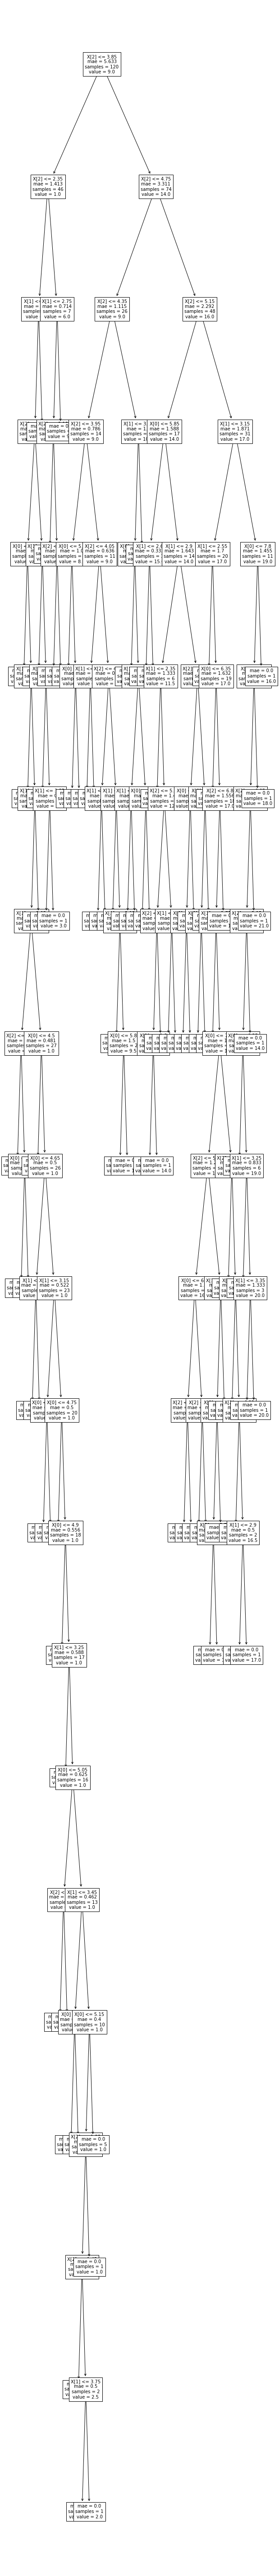

In [45]:
fig, ax = plt.subplots(figsize = (10, 105))
plot_tree(dt_regressor, fontsize = 10)